# Factors that Impact Airbnb Listing Prices

## Introduction: 
This project uses data from Airbnb listings in Boston between September 2016 and September 2017 to determine which factors have the greatest impact on listing price.

Questions to be answered:
1. Which neighborhood has the highest average listing price?
2. Which variables have the strongest relationship with listing price?
3. Evaluate the effectiveness of regression for predicting listing price.

Data Source: https://www.kaggle.com/airbnb/boston

## Step 1: Business Understanding

Airbnb is an online platform for connecting hosts and guests for accommodation and travel experiences.  Hosts advertise space to rent and set a price while guests can browse through these listings and select a stay.

## Step 2: Data Understanding
To better understand the data in this set, the first few rows of the data are manually reviewed and a judgement call is made to select columns that should be used in this analysis.  Columns are selected based on their hypothesized impact on listing price; these columns will be further analyzed with respect to price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./boston/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


From reviewing these first few rows, this analysis will focus on the following columns.  

- price:                    Dependent variable in the analysis.
- summary:                  Does the length of this field (total # of characters) have a relationship with price?
- space:                    Does the length of this field (total # of characters) have a relationship with price?
- description:              Does the length of this field (total # of characters) have a relationship with price?
- neighborhood_overview:    Does the length of this field (total # of characters) have a relationship with price?
- host_since:               Does the duration of time that the host has been on Airbnb have an impact on the price?
- property_type:            Does the property type have a relationship with price?
- accommodates:             Does the number of people the listing accommodates impact price?
- bathrooms:                Does the number of bathrooms impact listing price?
- bedrooms:                 Does the number of bedrooms impact listing price?
- beds:                     Does the number of beds impact listing price?
- bed_type:                 Does the type of bed offered affect price?
- minimum_nights:           Does the minimum number of nights impact price?
- number_of_reviews:        Does the total number of reviews of a place impact price?
- review_scores_rating:     Does review score impact price?
- cancellation_policy:      Does cancellation policy impact price?
- reviews_per_month:        Does the number of reviews per month impact price?
- neighbourhood_cleansed:   Does the nieghborhood influence price?
- calendar_last_scraped:    This column will be used to determine the time difference with the host_since column.

## Step 3: Data Preparation
Substeps to be taken:
1. Drop columns that won't be used in this analysis.
2. Evaluate the data types and determine what to do with nulls in the data
3. Convert all quantities to numeric values (i.e., dummy variables or character lengths of the descriptions)

In [3]:
columnsOfInterest = ['price', 'summary', 'space', 'description', 'neighborhood_overview', 'host_since', 'property_type', 
                     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'minimum_nights', 
                     'number_of_reviews', 'review_scores_rating', 'cancellation_policy', 'reviews_per_month', 
                     'neighbourhood_cleansed', 'calendar_last_scraped']
df = df[columnsOfInterest]

In [4]:
print('Resulting Rows: {}, Columns: {}'.format(df.shape[0], df.shape[1]))

Resulting Rows: 3585, Columns: 19


Determine all data types begin converting object data types to numerics.

In [5]:
dftn = pd.concat([df.dtypes, df.isnull().sum()], axis=1)
dftn.columns = ['dtype', 'nulls']
dftn

,dtype,nulls
price,object,0
summary,object,143
space,object,1057
description,object,0
neighborhood_overview,object,1415
host_since,object,0
property_type,object,3
accommodates,int64,0
bathrooms,float64,14
bedrooms,float64,10


In [6]:
df['calendar_last_scraped']

0       2016-09-06
1       2016-09-06
2       2016-09-06
3       2016-09-06
4       2016-09-06
           ...    
3580    2016-09-06
3581    2016-09-06
3582    2016-09-06
3583    2016-09-06
3584    2016-09-06
Name: calendar_last_scraped, Length: 3585, dtype: object

### a. Price Column
Convert this column from a string to float and get rid of special characters like '$' and ','

In [7]:
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True)
df['price'] = df['price'].astype(float)

In [8]:
df['price'].dtype

dtype('float64')

### b. Summary, Space, Description, Neighborhood Overview Columns
Convert these columns from strings to lengths of string characters (integer values).
Treat NaNs as an empty field (0 length).

In [9]:
descriptiveCols = ['summary', 'space', 'description', 'neighborhood_overview']

In [10]:
print('NaNs in each column:')
df[descriptiveCols].isnull().sum()

NaNs in each column:


summary                   143
space                    1057
description                 0
neighborhood_overview    1415
dtype: int64

In [11]:
for i in descriptiveCols:
    df[i] = df[i].fillna('0')
    df[i] = df[i].str.len()

In [12]:
print('NaNs in each column:')
df[descriptiveCols].isnull().sum()

NaNs in each column:


summary                  0
space                    0
description              0
neighborhood_overview    0
dtype: int64

### c. Host Since Column
Convert this column to date format and calculate time difference from the date the data was taken (calendar_last_scraped column).  Drop the calendar_last_scraped column.

In [13]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = pd.to_datetime(df['calendar_last_scraped'][0]) - df['host_since']
df['host_since'] = df['host_since'].dt.days
df.drop(['calendar_last_scraped'], axis=1, inplace=True)
# df['host_since'].head()

### d. Property Type Column
Create dummy variables for the property types column. Combine NaNs into 'Other'.

In [14]:
property_types = list(df['property_type'].unique())
property_types
print('Listings with each property type:')
df['property_type'].value_counts()

Listings with each property type:


Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

With the property types that have a low number of listings associated with them (i.e., Townhouse through Camper/RV), combine them into 'Other'.

In [15]:
property_types = ['Apartment', 'House', 'Condominium']

In [16]:
df['property_type'].isnull().sum()

3

In [17]:
df['property_type'] = df['property_type'].fillna('Other')

In [18]:
for (i, value) in df['property_type'].iteritems():
    if value not in property_types:
        df.loc[i, 'property_type'] = 'Other'

In [19]:
df['property_type'].value_counts()

Apartment      2612
House           562
Condominium     231
Other           180
Name: property_type, dtype: int64

In [20]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy, choose how to handle NaNs first!
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, 
                                            prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
                    # drop_first removes the first column, leaves this column as the 0 0 0 value, course sets as True
        except:
            continue
    return df

In [21]:
df = create_dummy_df(df, ['property_type'], False)

In [22]:
print('Confirm columns were created:')
df.columns

Confirm columns were created:


Index(['price', 'summary', 'space', 'description', 'neighborhood_overview',
       'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'reviews_per_month',
       'neighbourhood_cleansed', 'property_type_Apartment',
       'property_type_Condominium', 'property_type_House',
       'property_type_Other'],
      dtype='object')

### e. Bed Type Column
Create dummy variables for this column.

In [23]:
df['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [24]:
df = create_dummy_df(df, ['bed_type'], False)

In [25]:
print('Confirm columns were created:')
df.columns

Confirm columns were created:


Index(['price', 'summary', 'space', 'description', 'neighborhood_overview',
       'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'cancellation_policy', 'reviews_per_month', 'neighbourhood_cleansed',
       'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Other', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed'],
      dtype='object')

### f. Cancellation_Policy Column
Create dummy variables for this column.

In [26]:
df['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [27]:
df = create_dummy_df(df, ['cancellation_policy'], False)

In [28]:
print('Confirm columns were created:')
df.columns

Confirm columns were created:


Index(['price', 'summary', 'space', 'description', 'neighborhood_overview',
       'host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'neighbourhood_cleansed',
       'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Other', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30'],
      dtype='object')

### g. Neighborhood_cleansed
Create dummy variables for this column and place into a new data frame (df_neighborhoods).

In [29]:
df_neighborhoods = create_dummy_df(df, ['neighbourhood_cleansed'], False)
print('Confirm all columns are numeric data types:')
df_neighborhoods.select_dtypes(include=['object']).shape

Confirm all columns are numeric data types:


(3585, 0)

## Step 4 Modeling & Evaluation
With the data prepared, analyze and model it to answer the guiding questions.

### Question 1: Which neighborhood has the highest average listing price?
Average is typically measured through the mean and median. To answer this, take the average of all prices within each neighborhood.  Provide supporting information such as the standard deviation, minimum price, maximum price, and total number of listings used in the average.

In [30]:
df_temp = pd.concat([df.groupby(['neighbourhood_cleansed']).mean()['price'], 
                 df.groupby(['neighbourhood_cleansed']).median()['price'],
                 df.groupby(['neighbourhood_cleansed']).std()['price'],
                 df.groupby(['neighbourhood_cleansed']).min()['price'],
                 df.groupby(['neighbourhood_cleansed']).max()['price'],
                 df.groupby(['neighbourhood_cleansed']).count()['price']], axis=1)
df_temp.columns = ['mean', 'median', 's.d.', 'min', 'max', 'count']
df_temp.sort_values(by=['median'], ascending=False)

,mean,median,s.d.,min,max,count
neighbourhood_cleansed,,,,,,
Leather District,253.600000,245.0,93.417343,159.0,390.0,5
South Boston Waterfront,306.060241,245.0,338.001203,115.0,3000.0,83
Downtown,236.459302,225.0,99.179108,10.0,600.0,172
Chinatown,232.352113,219.0,87.948053,80.0,399.0,71
Back Bay,240.950331,209.0,130.481478,40.0,1250.0,302
Bay Village,266.833333,206.5,148.640701,90.0,500.0,24
West End,209.591837,199.0,79.530895,60.0,450.0,49
Beacon Hill,224.443299,195.0,162.333947,75.0,1345.0,194
Fenway,220.393103,191.0,265.336016,30.0,4000.0,290


From this table, the neighborhoods that command the highest average listing price are the Leather District, South Boston Waterfront, and Downtown.  It is worth noting that the number of listings for Leather District are low compared to those for South Boston Waterfront and Downtown.  Furthermore, the standard deviation of prices for the South Boston Waterfront are the highest for this entire table.

In [31]:
df_leatherdistrict = df.loc[df['neighbourhood_cleansed'] == 'Leather District']
df_southbostonwaterfront = df.loc[df['neighbourhood_cleansed'] == 'South Boston Waterfront']
df_downtown = df.loc[df['neighbourhood_cleansed'] == 'Downtown']

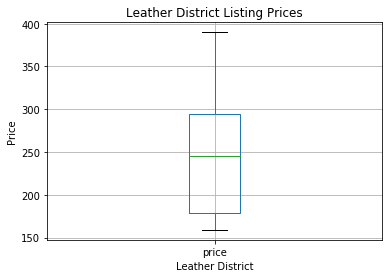

In [32]:
df_leatherdistrict.boxplot(column=['price']);
plt.title('Leather District Listing Prices');
plt.xlabel('Leather District');
plt.ylabel('Price');

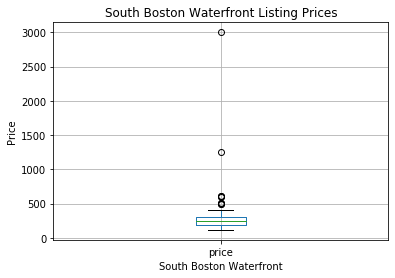

In [33]:
df_southbostonwaterfront.boxplot(column=['price']);
plt.title('South Boston Waterfront Listing Prices');
plt.xlabel('South Boston Waterfront');
plt.ylabel('Price');

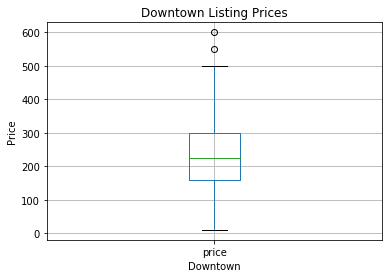

In [34]:
df_downtown.boxplot(column=['price']);
plt.title('Downtown Listing Prices');
plt.xlabel('Downtown');
plt.ylabel('Price');

### Question 2: Which variables have the strongest relationship with listing price?
To answer this question, the correlation matrix from the dataframe is calculated.  High correlation coefficients in this matrix indicate there is a strong relationship between two of the variables.

In [35]:
df_corr = abs(df.corr())
df_corr = df.corr()
z = df_corr.sort_values(by=['price'], ascending=False)['price']
z

price                                  1.000000
accommodates                           0.437756
bedrooms                               0.385298
beds                                   0.370013
bathrooms                              0.248234
space                                  0.168938
cancellation_policy_super_strict_30    0.157840
bed_type_Real Bed                      0.113027
review_scores_rating                   0.105651
property_type_Apartment                0.088830
cancellation_policy_strict             0.085654
description                            0.073479
host_since                             0.062723
neighborhood_overview                  0.057819
property_type_Condominium              0.028880
minimum_nights                         0.020054
property_type_Other                   -0.008489
summary                               -0.018801
bed_type_Couch                        -0.026505
cancellation_policy_moderate          -0.044756
bed_type_Pull-out Sofa                -0

In [36]:
z.shape

(27,)

From the magnitude of the correlation coefficients above, parameters such as the number of people accommodated, the number of bedrooms, beds, and bathrooms had the highest values.  Since these correlation coefficients had positive correlation values between 0.24 and 0.44, a weak to moderate positive coorelation can be expected between them and price.

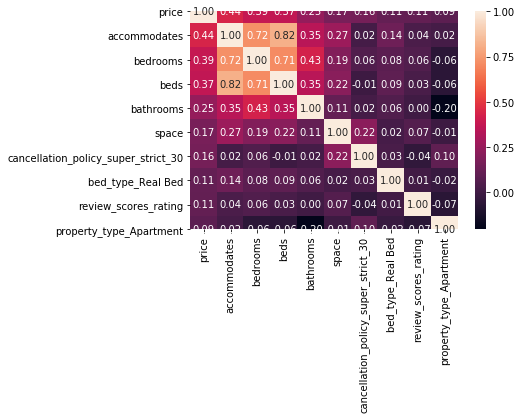

In [37]:
sns.heatmap(df[list(z.index)[0:10]].corr(), annot=True, fmt=".2f");

### Question 3: Evaluate the effectiveness of regression for predicting listing price.
To answer this question, a linear regression is taken with price as the dependent variable and all other parameters as independent variables.  The R2 will be used to test the strength of the linear relationship.  To simplify the analysis, rows with NaNs will be dropped.  

In [38]:
df

,price,summary,space,description,neighborhood_overview,host_since,accommodates,bathrooms,bedrooms,beds,...,property_type_Other,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,250.0,249,481,1000,397,510,4,1.5,2.0,3.0,...,0,0,0,0,0,1,0,1,0,0
1,65.0,247,73,1000,355,1552,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
2,65.0,244,1000,1000,953,2675,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
3,75.0,493,631,1000,1000,1234,4,1.0,1.0,2.0,...,0,0,0,0,0,1,0,1,0,0
4,79.0,245,248,1000,720,849,2,1.5,1.0,2.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,242,1,242,1,768,3,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3581,150.0,171,19,249,1,432,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3582,198.0,156,132,658,112,966,4,1.0,1.0,1.0,...,0,0,0,0,0,1,1,0,0,0
3583,65.0,319,1,319,1,102,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [39]:
df = df.dropna(axis=0)

In [40]:
#Split into explanatory and response variables
X = df.drop(['price', 'neighbourhood_cleansed'], axis=1)
#X = df.drop(['price'], axis=1)

y = df['price']

test_size = 0.3
rand_state = 4

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [41]:
print('Test Score: ', test_score)
print('Train Score: ', train_score)

Test Score:  0.48067085613724403
Train Score:  0.48311205726444506


Based on the R2 values for the test and train sets, only about 48% of the variation in a listing's price can be explained by the parameters that were selected in this analysis.  Overfitting is not a concern as the test and train scores are close to each other.